
# 01 — Train KNN dari CSV Landmarks + Evaluasi

## Tujuan
- Load CSV hasil ekstraksi landmarks
- Encode label huruf menjadi angka
- Split train/test
- Train KNN
- Evaluasi: Accuracy, Precision, Recall, F1, Confusion Matrix
- Simpan model ke folder `models/`


Cell 1 (Code) — Load data + validasi

In [40]:
from pathlib import Path
import pandas as pd
import numpy as np
import joblib

# sklearn (train + evaluasi)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

ROOT = Path.cwd().parent
CSV_PATH = ROOT / "data" / "landmarks" / "asl_alphabet_landmarks.csv"
MODEL_DIR = ROOT / "models"
MODEL_DIR.mkdir(exist_ok=True)

# baca CSV
df = pd.read_csv(CSV_PATH)
print("Shape df:", df.shape)

# kalau kosong, berarti ekstraksi gagal (n_samples=0)
if len(df) == 0:
    raise RuntimeError("CSV kosong. Jalankan Notebook 00 sampai Total ditulis > 0.")

# lihat contoh data
df.head()


Shape df: (638, 64)


,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62
0,A,0.0,0.0,0.0,0.323303,-0.180658,-0.018819,0.508452,-0.455344,-0.023639,...,-0.140506,-0.071528,-0.648338,-0.254957,-0.035581,-0.484678,-0.253076,-0.017345,-0.340459,-0.224410
1,A,0.0,0.0,0.0,0.290354,-0.102496,-0.080144,0.542123,-0.335659,-0.127048,...,-0.164255,-0.153512,-0.659193,-0.259997,-0.139980,-0.518658,-0.243935,-0.122848,-0.388286,-0.212499
2,A,0.0,0.0,0.0,0.313087,-0.126454,-0.061186,0.513446,-0.388227,-0.085828,...,-0.128682,-0.058872,-0.642589,-0.267065,-0.026289,-0.450610,-0.260062,-0.020302,-0.305453,-0.217068
3,A,0.0,0.0,0.0,0.285592,-0.058185,-0.046272,0.513014,-0.360337,-0.045050,...,-0.111728,-0.210565,-0.656082,-0.243623,-0.176403,-0.455699,-0.236734,-0.161666,-0.296021,-0.201145
4,A,0.0,0.0,0.0,0.322285,-0.154889,-0.047949,0.513749,-0.411051,-0.068890,...,-0.110968,-0.199757,-0.640796,-0.214727,-0.147351,-0.475638,-0.198450,-0.111540,-0.341531,-0.161949


Cell 2 (Markdown)
## KNN + Scaling (Pipeline)
KNN menghitung jarak antar titik; scaling membantu fitur punya skala yang seragam.
Kita pakai `weights="distance"` agar tetangga yang lebih dekat lebih berpengaruh.


Cell 3 (Code) — Split, train, evaluasi metrik

Accuracy : 0.9601659751037345
Precision: 0.9567037210671345
Recall   : 0.9558104814336202
F1       : 0.9557843101215068
Confusion Matrix:
 [[41  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
   0  0]
 [ 0 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0 37  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  1 47  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  1]
 [ 0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  2 46  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 46  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  1  0 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0

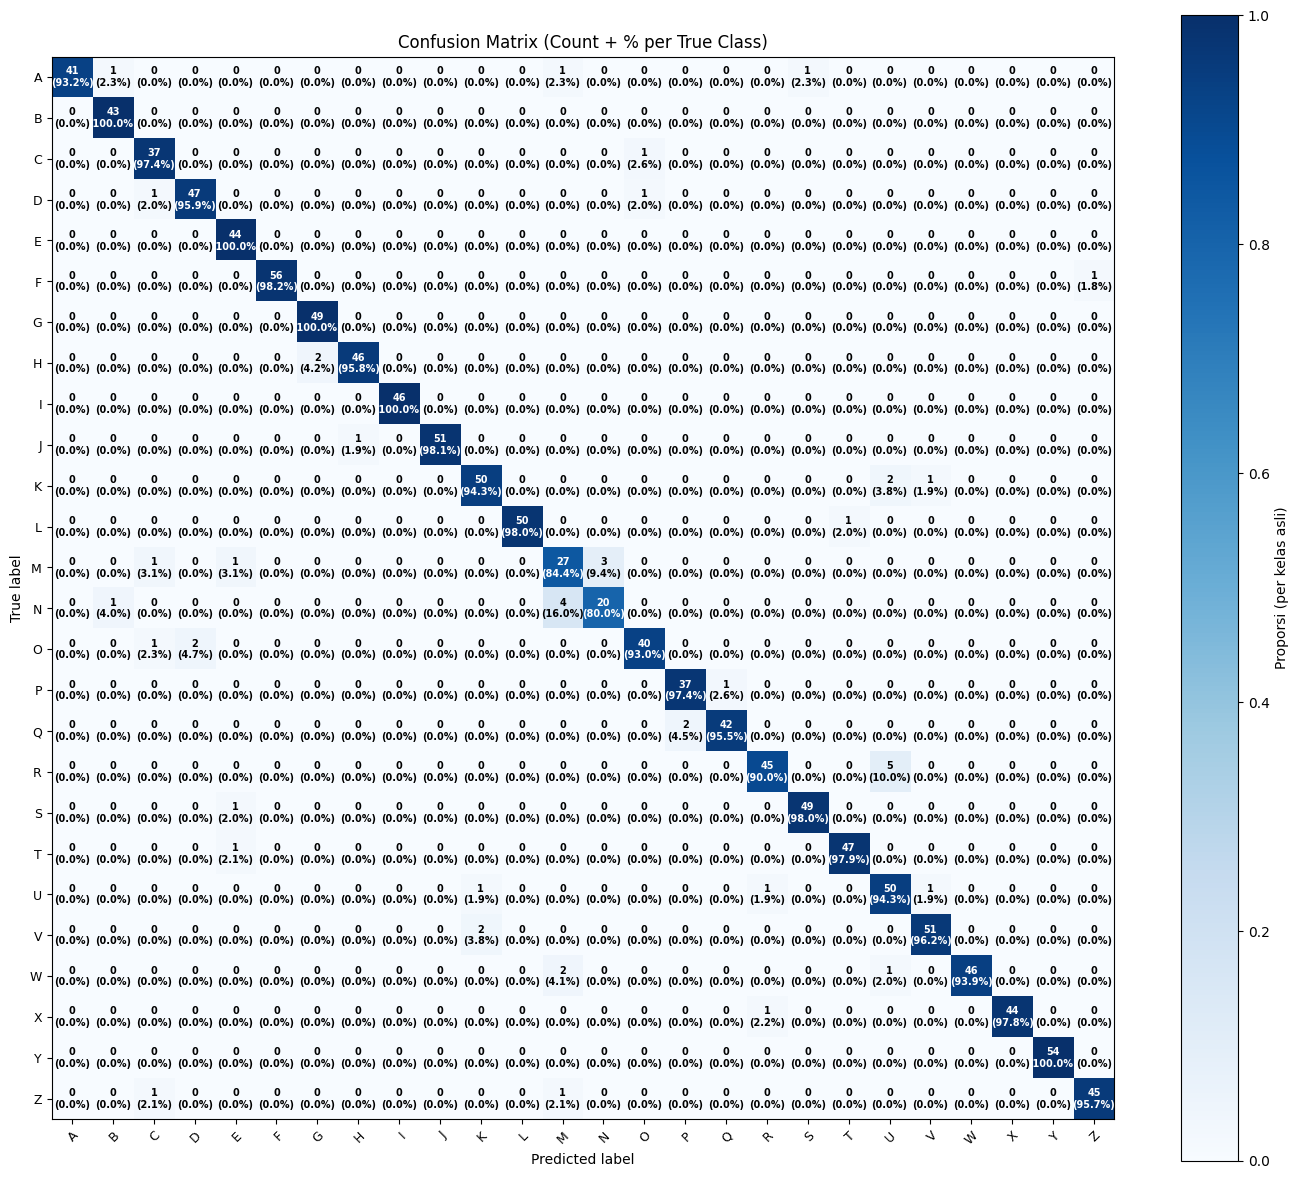

,precision,recall,f1-score,support
A,1.000000,0.931818,0.964706,44.000000
B,0.955556,1.000000,0.977273,43.000000
C,0.902439,0.973684,0.936709,38.000000
D,0.959184,0.959184,0.959184,49.000000
E,0.936170,1.000000,0.967033,44.000000
F,1.000000,0.982456,0.991150,57.000000
G,0.960784,1.000000,0.980000,49.000000
H,0.978723,0.958333,0.968421,48.000000
I,1.000000,1.000000,1.000000,46.000000
J,1.000000,0.980769,0.990291,52.000000


In [ ]:
# ====== X dan y ======
X = df.drop(columns=["label"]).values.astype(np.float32)  # fitur 63 kolom
y = df["label"].values                                    # label huruf (A,B,C,...)

# ====== Encode label: huruf -> angka ======
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ====== Split train/test ======
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc,
    test_size=0.2,          # 20% test
    random_state=42,        # hasil konsisten
    stratify=y_enc          # proporsi kelas tetap seimbang
)

# ====== Pipeline: scaler + KNN ======
model = Pipeline([
    ("scaler", StandardScaler()),  # standarisasi fitur
    ("knn", KNeighborsClassifier(
        n_neighbors=7,             # K (bisa kamu eksperimen)
        weights="distance",        # tetangga dekat lebih berpengaruh
        metric="euclidean"         # metrik jarak
    ))
])

# ====== Training ======
model.fit(X_train, y_train)

# ====== Prediksi ======
pred = model.predict(X_test)

# ====== Evaluasi ======
acc = accuracy_score(y_test, pred)  # akurasi
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, pred,
    average="macro",    # macro: semua kelas bobot sama
    zero_division=0
)
cm = confusion_matrix(y_test, pred)  # confusion matrix

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1       :", f1)
print("Confusion Matrix:\n", cm)

# ====== Visualisasi Confusion Matrix (rapi + biru + teks kontras) ======
labels = le.classes_                 # nama kelas asli (A, B, C, ...)
label_ids = np.arange(len(labels))   # id kelas 0..n-1

# CM untuk plot dibuat konsisten ukurannya (meski ada kelas tidak muncul di test)
cm_plot = confusion_matrix(y_test, pred, labels=label_ids)

cm_plot = cm_plot.astype(float)
row_sum = cm_plot.sum(axis=1, keepdims=True)
cm_norm = np.divide(cm_plot, row_sum, out=np.zeros_like(cm_plot), where=row_sum != 0)

fig, ax = plt.subplots(figsize=(14, 12))
im = ax.imshow(cm_norm, interpolation="nearest", cmap="Blues")  # <-- biru
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Proporsi (per kelas asli)", rotation=90)

ax.set(
    xticks=np.arange(len(labels)),
    yticks=np.arange(len(labels)),
    xticklabels=labels,
    yticklabels=labels,
    xlabel="Predicted label",
    ylabel="True label",
    title="Confusion Matrix (Count + % per True Class)"
)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.tick_params(axis="both", labelsize=9)

# Tulis Count + Persentase di tiap sel (warna teks otomatis biar kebaca)
thr = 0.5  # ambang gelap/terang (0–1). coba 0.4 kalau mau lebih banyak putih
fs = 7 if len(labels) > 20 else 9

for i in range(cm_plot.shape[0]):
    for j in range(cm_plot.shape[1]):
        count = int(cm_plot[i, j])
        pct = cm_norm[i, j] * 100
        txt_color = "white" if cm_norm[i, j] >= thr else "black"

        ax.text(
            j, i,
            f"{count}\n({pct:.1f}%)",
            ha="center", va="center",
            fontsize=fs,
            color=txt_color,
            fontweight="bold"
        )

ax.set_ylim(len(labels) - 0.5, -0.5)  # biar axis rapi (bugfix umum di matplotlib)
ax.grid(False)
plt.tight_layout()
plt.show()

# ====== Classification Report per Kelas ======
import pandas as pd

report_dict = classification_report(
    y_test, pred,
    labels=label_ids,
    target_names=labels,
    zero_division=0,
    output_dict=True
)
display(pd.DataFrame(report_dict).T)


Cell 4 (Markdown)
## Eksperimen 
Coba beberapa K (misal 1,3,5,7,9,11) dan bandingkan akurasi.
Kalau mau, bisa juga coba metric `manhattan`.

Cell 5 (Code) — Eksperimen K cepat

In [ ]:
Ks = [1, 3, 5, 7, 9, 11]
for k in Ks:
    m = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean"))
    ])
    m.fit(X_train, y_train)
    p = m.predict(X_test)
    print("K =", k, " | Accuracy =", accuracy_score(y_test, p))


K = 1  | Accuracy = 0.9676348547717842
K = 3  | Accuracy = 0.9593360995850623
K = 5  | Accuracy = 0.9609958506224067
K = 7  | Accuracy = 0.9601659751037345
K = 9  | Accuracy = 0.9568464730290457
K = 11  | Accuracy = 0.9493775933609958


Cell 6 (Code) — Save model

In [ ]:
# simpan pipeline dan label encoder
joblib.dump(model, MODEL_DIR / "knn_landmarks.joblib")
joblib.dump(le, MODEL_DIR / "label_encoder.joblib")

print("✅ Saved:", MODEL_DIR / "knn_landmarks.joblib")
print("✅ Saved:", MODEL_DIR / "label_encoder.joblib")


✅ Saved: d:\KULIAH\SEMESTER 5\KECERDASAN BUATAN\TUBES 3\asl-knn-landmarks\models\knn_landmarks.joblib
✅ Saved: d:\KULIAH\SEMESTER 5\KECERDASAN BUATAN\TUBES 3\asl-knn-landmarks\models\label_encoder.joblib
